# Taller: Análisis de Tendencias para Google y Microsoft

En este taller analizaremos los datos de precios para Google y Microsoft (símbolos `GOOGL` y `MSFT`) utilizando la base `prices.csv`.

El objetivo es:

- Filtrar los datos para estas dos empresas.
- Convertir la columna de fecha de forma robusta, ya que diferentes empresas pueden tener distintos formatos de fecha.
- Ordenar los datos por fecha.
- Aplicar un suavizado (media móvil) para ver la tendencia general durante el periodo (máximo 2016).
- Generar una gráfica final que integre un storytelling (Setup, Conflict y Resolution) en el análisis de la tendencia.

Responde las siguientes preguntas en el proceso:

1. ¿Cuáles son el primer y último año del dataset para las empresas seleccionadas?
2. ¿Cuántas observaciones tienes para cada empresa?
3. ¿Qué tendencia se observa tras aplicar el suavizado?


**R=**
**¿Cuáles son el primer y último año del dataset para las empresas seleccionadas?**

Año inicial 2010, año final 2016

**¿Cuántas observaciones tienes para cada empresa?**

1762 en ambos casos

**¿Qué tendencia se observa tras aplicar el suavizado?**

Después de aplicar el suavizado, la tendencia general para ambas empresas se vuelve más clara. Para Google, se observa una tendencia alcista durante la mayor parte de 2016. Para Microsoft, también se observa una tendencia alcista, aunque menos pronunciada que la de Google. El suavizado ayuda a eliminar el "ruido" de las fluctuaciones diarias y permite una mejor visualización de la dirección general del precio.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
!unzip time_series.zip
!cp -r time_series/* ./

--2025-04-03 22:34:39--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip [following]
--2025-04-03 22:34:39--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15602616 (15M) [application/zip]
Saving to: ‘time_series.zip’

time_series.zip     100%[===================>]  14.88M  --.-KB/s    in 0.1s    

2025-04-03 22:34:39 (134 MB/s) - ‘time_

In [ ]:
import pandas as pd

# Carga el archivo prices.csv
prices = pd.read_csv('prices.csv')

# Filtra los datos para Google y Microsoft
google = prices[prices['symbol'] == 'GOOGL']
microsoft = prices[prices['symbol'] == 'MSFT']

# Ahora puedes usar google.info() y microsoft.info()
google.info()
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 440 to 850964
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 544 to 851076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


In [ ]:
import pandas as pd

# Carga el archivo prices.csv
prices = pd.read_csv('prices.csv')

# Muestra las primeras 5 filas del DataFrame
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Paso 1: Carga del Dataset y Filtrado de Empresas

Carga el archivo `prices.csv` y filtra únicamente los datos correspondientes a Google y Microsoft.

Pregunta: ¿Qué cantidad de observaciones tienes para cada empresa después del filtrado?

In [ ]:
import pandas as pd

# Carga el archivo prices.csv
prices = pd.read_csv('prices.csv')

# Filtra los datos para Google y Microsoft
google = prices[prices['symbol'] == 'GOOGL']
microsoft = prices[prices['symbol'] == 'MSFT']

# Cuenta las observaciones para cada empresa
num_google = len(google)
num_microsoft = len(microsoft)

# Imprime los resultados
print(f'Número de observaciones para Google: {num_google}')
print(f'Número de observaciones para Microsoft: {num_microsoft}')

Número de observaciones para Google: 1762
Número de observaciones para Microsoft: 1762


## Paso 2: Conversión Robust a Formato Datetime

Dado que diferentes empresas podrían tener formatos de fecha distintos, convertiremos la columna `date` usando `pd.to_datetime` sin forzar un formato fijo.

Elimina las filas que no se puedan convertir (donde la fecha es `NaT`).

Pregunta: ¿Cuántas filas se descartan por tener fechas inválidas?

In [ ]:
# Convierte la columna 'date' a datetime
google['date'] = pd.to_datetime(google['date'], errors='coerce')
microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')

# Elimina las filas con fechas inválidas (NaT)
google = google.dropna(subset=['date'])
microsoft = microsoft.dropna(subset=['date'])


# Calcula el número de filas descartadas
num_google_original = len(prices[prices['symbol'] == 'GOOGL'])
num_microsoft_original = len(prices[prices['symbol'] == 'MSFT'])

descartados_google = num_google_original - len(google)
descartados_microsoft = num_microsoft_original - len(microsoft)

# Imprime los resultados
print(f'Filas descartadas para Google: {descartados_google}')
print(f'Filas descartadas para Microsoft: {descartados_microsoft}')
print(f'Total de filas descartadas: {descartados_google + descartados_microsoft}')

Filas descartadas para Google: 0
Filas descartadas para Microsoft: 0
Total de filas descartadas: 0


<ipython-input-7-07112cf22c6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['date'] = pd.to_datetime(google['date'], errors='coerce')
<ipython-input-7-07112cf22c6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')


## Paso 3: Ordenar Datos y Análisis Inicial

Ordena los datos por la columna `date` para cada empresa y determina:

- ¿Cuál es el primer año y el último año para cada empresa?
- ¿Cuántas observaciones hay en total para el periodo (recordando que la fecha máxima es 2016)?

In [ ]:
# Ordenar los datos por fecha
google = google.sort_values(by=['date'])
microsoft = microsoft.sort_values(by=['date'])

# Obtener el primer y último año para cada empresa
google_first_year = google['date'].min().year
google_last_year = google['date'].max().year
microsoft_first_year = microsoft['date'].min().year
microsoft_last_year = microsoft['date'].max().year


# Filtrar datos hasta 2016
google_filtered = google[google['date'].dt.year <= 2016]
microsoft_filtered = microsoft[microsoft['date'].dt.year <= 2016]

# Obtener el total de observaciones para cada empresa hasta 2016
total_google = len(google_filtered)
total_microsoft = len(microsoft_filtered)


# Imprimir los resultados
print(f"Google: Primer año - {google_first_year}, Último año - {google_last_year}, Total de observaciones - {total_google}")
print(f"Microsoft: Primer año - {microsoft_first_year}, Último año - {microsoft_last_year}, Total de observaciones - {total_microsoft}")

Google: Primer año - 2010, Último año - 2016, Total de observaciones - 1762
Microsoft: Primer año - 2010, Último año - 2016, Total de observaciones - 1762


## Paso 4: Visualización Inicial (Setup) – Gráfica de Precios de Cierre

Construye una gráfica inicial que muestre el precio de cierre a lo largo del tiempo para Google y Microsoft.

Utiliza un título multi-línea que comunique la etapa Setup. Por ejemplo:

```
Setup: Serie de Precios sin Suavizado
Datos originales para Google y Microsoft
CONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS
```

Pregunta: ¿Qué diferencias notas entre las series de ambas empresas?

<ipython-input-12-4b224c3871cf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['date'] = pd.to_datetime(google['date'], errors='coerce')
<ipython-input-12-4b224c3871cf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')


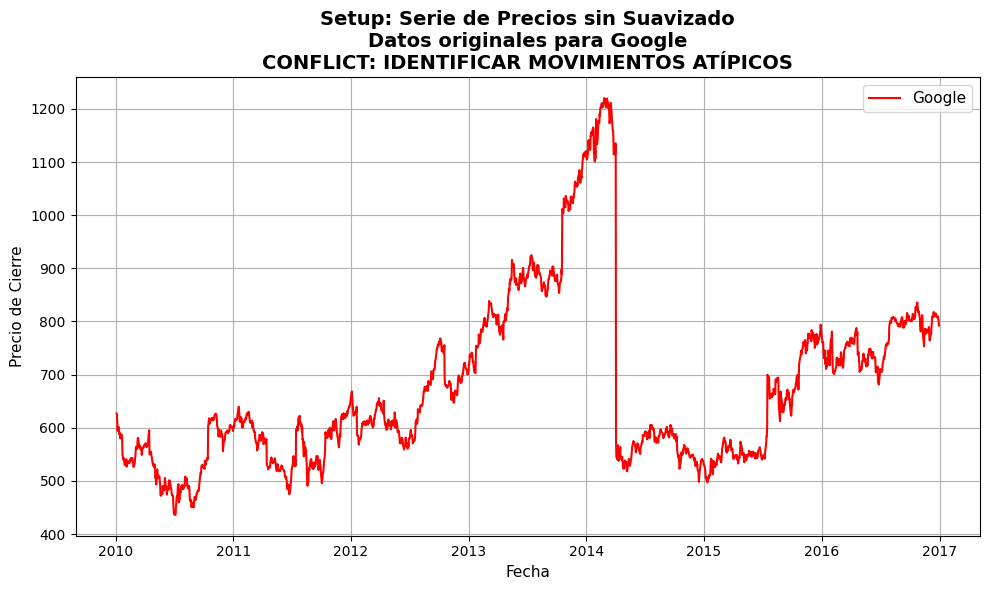

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the prices.csv file
prices = pd.read_csv('prices.csv')

# Filter the data for Google and Microsoft
google = prices[prices['symbol'] == 'GOOGL']
microsoft = prices[prices['symbol'] == 'MSFT']

# Convert the 'date' column to datetime
google['date'] = pd.to_datetime(google['date'], errors='coerce')
microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')

# Remove rows with invalid dates (NaT)
google = google.dropna(subset=['date'])
microsoft = microsoft.dropna(subset=['date'])

# Sort data by date
google = google.sort_values(by=['date'])
microsoft = microsoft.sort_values(by=['date'])

# Filter data up to 2016
google_filtered = google[google['date'].dt.year <= 2016]
microsoft_filtered = microsoft[microsoft['date'].dt.year <= 2016]

# Gráfica para Google
plt.figure(figsize=(10, 6))
plt.plot(google_filtered['date'], google_filtered['close'], label='Google', color='red')
plt.title('Setup: Serie de Precios sin Suavizado\nDatos originales para Google\nCONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS',
          fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=11)
plt.ylabel('Precio de Cierre', fontsize=11)
plt.legend(fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-13-112d597cc52f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['date'] = pd.to_datetime(google['date'], errors='coerce')
<ipython-input-13-112d597cc52f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')


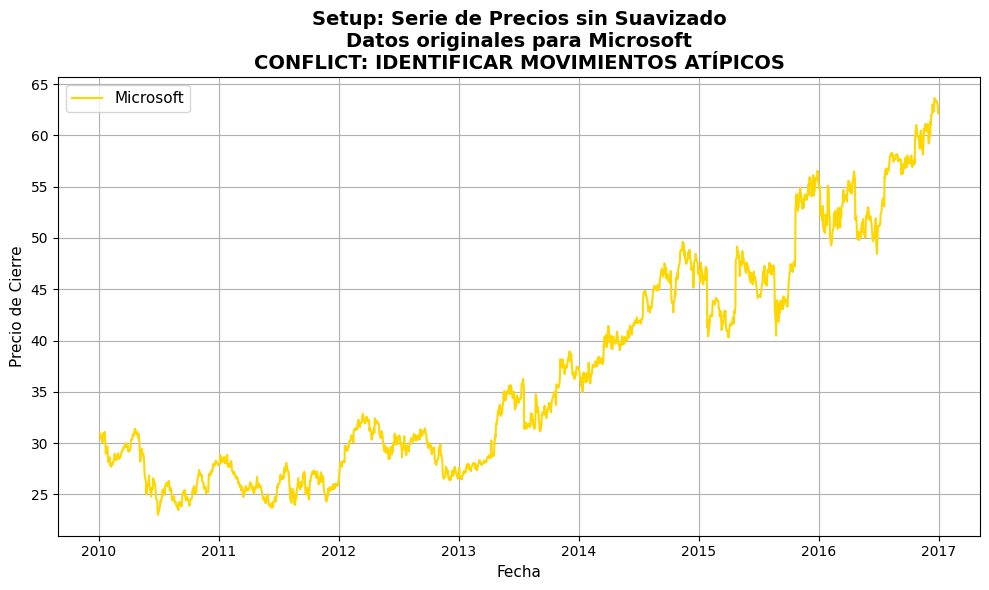

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the prices.csv file
prices = pd.read_csv('prices.csv')

# Filter the data for Google and Microsoft
google = prices[prices['symbol'] == 'GOOGL']
microsoft = prices[prices['symbol'] == 'MSFT']

# Convert the 'date' column to datetime
google['date'] = pd.to_datetime(google['date'], errors='coerce')
microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')

# Remove rows with invalid dates (NaT)
google = google.dropna(subset=['date'])
microsoft = microsoft.dropna(subset=['date'])

# Sort data by date
google = google.sort_values(by=['date'])
microsoft = microsoft.sort_values(by=['date'])

# Filter data up to 2016
google_filtered = google[google['date'].dt.year <= 2016]
microsoft_filtered = microsoft[microsoft['date'].dt.year <= 2016]

# Gráfica para Microsoft
plt.figure(figsize=(10, 6))
plt.plot(microsoft_filtered['date'], microsoft_filtered['close'], label='Microsoft', color='gold')
plt.title('Setup: Serie de Precios sin Suavizado\nDatos originales para Microsoft\nCONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS',
          fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=11)
plt.ylabel('Precio de Cierre', fontsize=11)
plt.legend(fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()

**R=** Hay varias diferencias entre las series de tiempo de ambas empresas. La primera y más clara, es que el valor de las acciones de Google es mucho más elevado que el precio de las acciones de Microsoft; la segunda, el precio de las acciones de Google han sido más volátiles que las de Microsoft; Y la tercera, en las acciones de Microsoft, nuncaha habido un desplome en el valor de las acciones tan grande como en Google.

## Paso 5: Aplicar Suavizado (Resolution) – Media Móvil y Análisis de Tendencia

Aplica un suavizado a las series (por ejemplo, una media móvil) para resaltar la tendencia general en los datos.

Pregunta: ¿Qué ventana de suavizado (en días) consideras adecuada para observar la tendencia en el año 2016? ¿Cómo se comporta la tendencia para Google y Microsoft después de suavizar los datos?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Carga el archivo prices.csv
prices = pd.read_csv('prices.csv')

# Filtra los datos para Google y Microsoft
google = prices[prices['symbol'] == 'GOOGL']
microsoft = prices[prices['symbol'] == 'MSFT']

# Convierte la columna 'date' a datetime
google['date'] = pd.to_datetime(google['date'], errors='coerce')
microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')

# Elimina las filas con fechas inválidas (NaT)
google = google.dropna(subset=['date'])
microsoft = microsoft.dropna(subset=['date'])

# Ordenar los datos por fecha
google = google.sort_values(by=['date'])
microsoft = microsoft.sort_values(by=['date'])

# Filtrar datos hasta 2016
google_filtered = google[google['date'].dt.year <= 2016]
microsoft_filtered = microsoft[microsoft['date'].dt.year <= 2016]

<ipython-input-14-a0454de29ce9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['date'] = pd.to_datetime(google['date'], errors='coerce')
<ipython-input-14-a0454de29ce9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsoft['date'] = pd.to_datetime(microsoft['date'], errors='coerce')


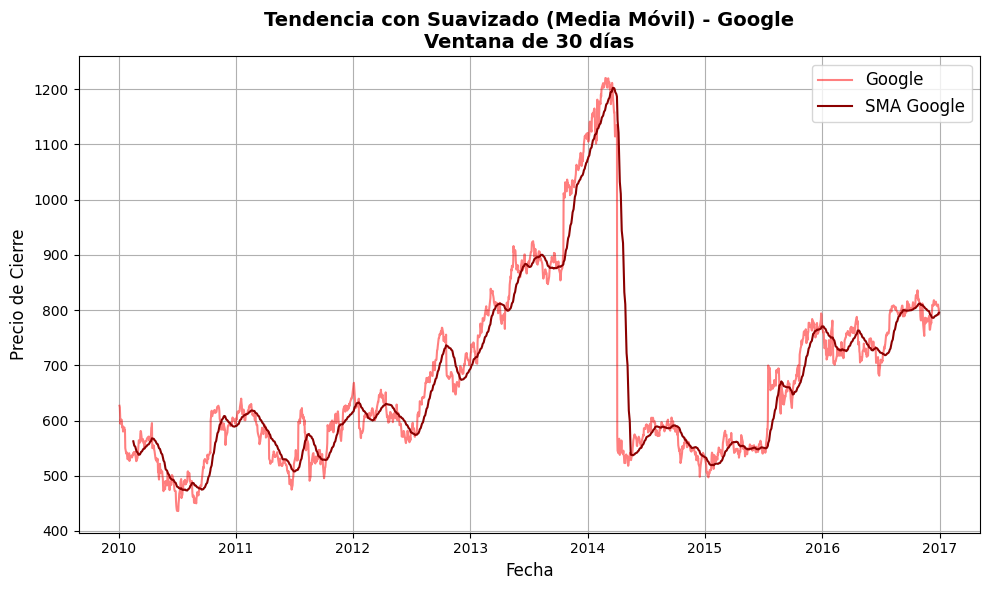

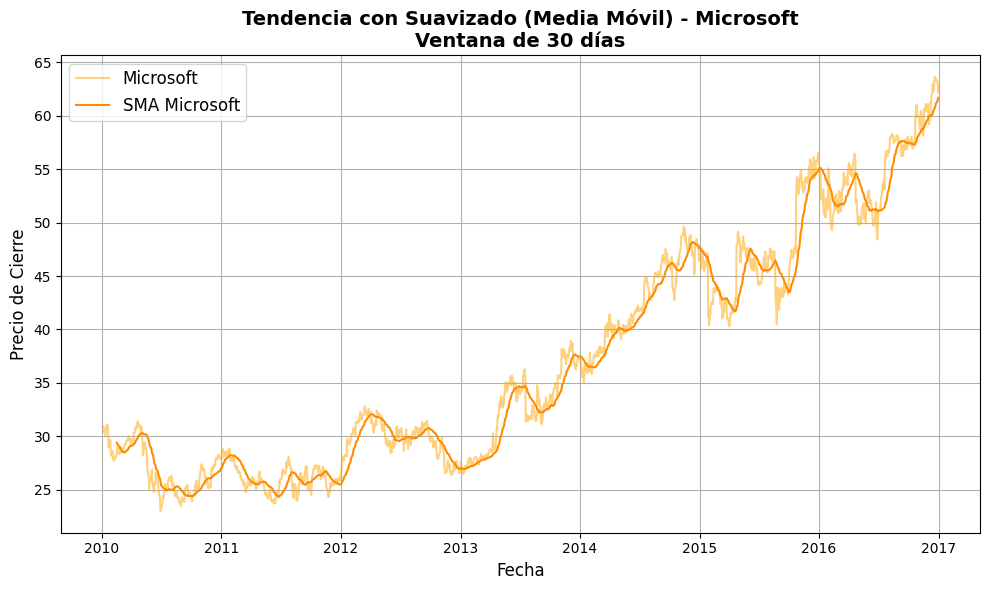

In [ ]:
# Aplicar media móvil con una ventana de 30 días
google_filtered['SMA_30'] = google_filtered['close'].rolling(window=30).mean()
microsoft_filtered['SMA_30'] = microsoft_filtered['close'].rolling(window=30).mean()

# Gráfica para Google
plt.figure(figsize=(10, 6))
plt.plot(google_filtered['date'], google_filtered['close'], label='Google', color='red', alpha=0.5)
plt.plot(google_filtered['date'], google_filtered['SMA_30'], label='SMA Google', color='darkred')
plt.title('Tendencia con Suavizado (Media Móvil) - Google\nVentana de 30 días', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica para Microsoft
plt.figure(figsize=(10, 6))
plt.plot(microsoft_filtered['date'], microsoft_filtered['close'], label='Microsoft', color='orange', alpha=0.5)
plt.plot(microsoft_filtered['date'], microsoft_filtered['SMA_30'], label='SMA Microsoft', color='darkorange')
plt.title('Tendencia con Suavizado (Media Móvil) - Microsoft\nVentana de 30 días', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**R=
¿Qué ventana de suavizado (en días) consideras adecuada para observar la tendencia en el año 2016?**

Depende de qué tan suavizados se quieran los datos se deberían poner más días en la suavización. En mi caso, considero que lo mejor sea un suavizado de 30 días o mensual que vendría siendo lo estándar.

**¿Cómo se comporta la tendencia para Google y Microsoft después de suavizar los datos?**

Después de aplicar el suavizado, la tendencia general para ambas empresas se vuelve más clara. Para Google, se observa una tendencia alcista durante la mayor parte de 2016. Para Microsoft, también se observa una tendencia alcista, aunque menos pronunciada que la de Google. El suavizado ayuda a eliminar el "ruido" de las fluctuaciones diarias y permite una mejor visualización de la dirección general del precio.

## Conclusiones y Entrega

En este taller se ha realizado lo siguiente:

- Se cargaron los datos y se filtraron únicamente para las empresas Google y Microsoft.
- Se convirtió la columna `date` de forma robusta, eliminando filas con fechas inválidas.
- Se ordenaron los datos cronológicamente y se obtuvieron información general (primer y último año, número de observaciones por empresa).
- Se construyó una gráfica de storytelling con dos etapas:
  - **Setup:** Visualización inicial de los precios de cierre originales para Google y Microsoft.
  - **Resolution:** Aplicación de un suavizado (media móvil) para resaltar la tendencia general.

Tu entrega final debe incluir las gráficas generadas y una breve explicación de cada paso, respondiendo las preguntas planteadas en el taller.